In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" seed """
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

""" participant """
name = "self_play"

""" policy """
name_policy = "greedy"

""" condition """
conds = ["1on1", "2on1", "2on1", "3on1", "3on1"] 

""" speed """
speed = "slow" # "slow", "equal" or "fast"

""" reward """
rewards = ["indiv", "indiv", "share", "indiv", "share"]


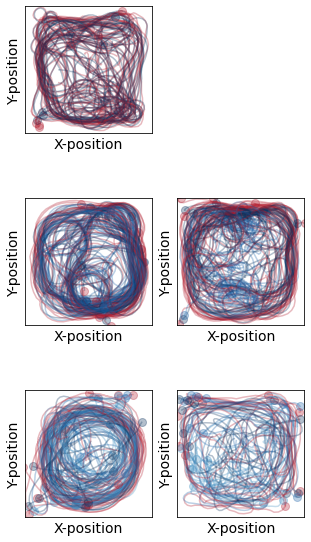

In [3]:
fig = plt.figure(figsize=(5,10))
markersize = 8
alpha = 0.3

""" color """
red = [177/255, 24/255, 42/255]
darkblue = [4/255, 44/255, 88/255]
blue = [31/255, 100/255, 169/255]
lightblue = [65/255, 144/255, 194/255]

for num in range(len(conds)):
    
    cond = conds[num]
    reward_p = rewards[num]

    if num == 0:
        ax = fig.add_subplot(3,2,num+1)
    else:
        ax = fig.add_subplot(3,2,num+2)
    
    """ seed """
    for seed in seeds:

        if cond == "1on1":
            rep = np.load("self_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        elif cond == "2on1":
            rep = np.load("self_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        elif cond == "3on1":
            rep = np.load("self_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        
        pos_list = np.array(rep["pos"]).squeeze()

        epis = 1
        for epi in range(epis):

            pos_e = np.array(pos_list[epi][0])
            pos_p1 = np.array(pos_list[epi][1])
            ax.plot(pos_e[:,0],  pos_e[:,1], color=red, alpha=alpha)
            ax.plot(pos_p1[:,0], pos_p1[:,1], color=darkblue, alpha=alpha)
            ax.plot(pos_e[-1,0],  pos_e[-1,1], 'o', markersize=markersize, color=red, alpha=alpha)
            ax.plot(pos_p1[-1,0], pos_p1[-1,1], 'o', markersize=markersize, color=darkblue, alpha=alpha)
            
            if cond == "2on1" or cond == "3on1":
                pos_p2 = np.array(pos_list[epi][2])
                ax.plot(pos_p2[:,0], pos_p2[:,1], color=blue, alpha=alpha)
                ax.plot(pos_p2[-1,0], pos_p2[-1,1], 'o', markersize=markersize, color=blue, alpha=alpha)
            
            if cond == "3on1":
                pos_p3 = np.array(pos_list[epi][3])
                ax.plot(pos_p3[:,0], pos_p3[:,1], color=lightblue, alpha=alpha)
                ax.plot(pos_p3[-1,0], pos_p3[-1,1], 'o', markersize=markersize, color=lightblue, alpha=alpha)
            
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
        ax.set_xlabel("X-position", fontsize=14)
        ax.set_ylabel("Y-position", fontsize=14)
        ax.set_aspect('equal')